In [1]:
!pip install caer canaro

In [2]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import numpy as np 
import pandas as pd
import canaro
import caer
import cv2 as cv
import gc

import matplotlib.pyplot as plt
from PIL import Image

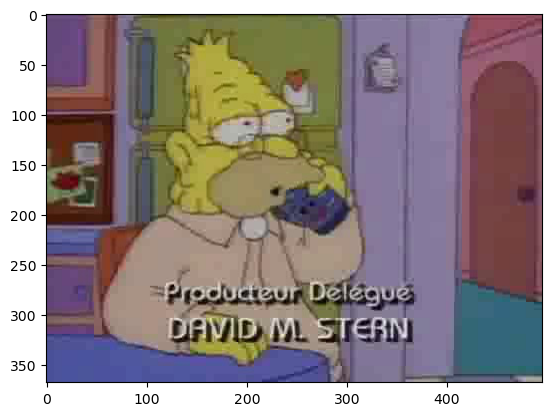

In [9]:

x=r"simpsons_dataset/abraham_grampa_simpson/pic_0001.jpg"

plt.imshow(Image.open(x))
plt.show()

In [10]:
IMG_SIZE=(80,80)
channel=1
#no of colour used in the image
#channel one means GreyScale(black and white)
char_path=r"simpsons_dataset"


In [11]:
char_dict={}
for char in os.listdir(char_path):
    char_dict[char]=len(os.listdir(os.path.join(char_path,char)))
print(char_dict)
print()
char_dict=caer.sort_dict(char_dict,descending=True)
print(char_dict)

{'abraham_grampa_simpson': 913, 'agnes_skinner': 42, 'apu_nahasapeemapetilon': 623, 'barney_gumble': 106, 'bart_simpson': 1342, 'carl_carlson': 98, 'charles_montgomery_burns': 1193, 'chief_wiggum': 986, 'cletus_spuckler': 47, 'comic_book_guy': 469, 'disco_stu': 8, 'edna_krabappel': 457, 'fat_tony': 27, 'gil': 27, 'groundskeeper_willie': 121, 'homer_simpson': 2246, 'kent_brockman': 498, 'krusty_the_clown': 1206, 'lenny_leonard': 310, 'lionel_hutz': 3, 'lisa_simpson': 1354, 'maggie_simpson': 128, 'marge_simpson': 1291, 'martin_prince': 71, 'mayor_quimby': 246, 'milhouse_van_houten': 1079, 'miss_hoover': 17, 'moe_szyslak': 1452, 'ned_flanders': 1454, 'nelson_muntz': 358, 'otto_mann': 32, 'patty_bouvier': 72, 'principal_skinner': 1194, 'professor_john_frink': 65, 'rainier_wolfcastle': 45, 'ralph_wiggum': 89, 'selma_bouvier': 103, 'sideshow_bob': 877, 'sideshow_mel': 40, 'snake_jailbird': 55, 'troy_mcclure': 8, 'waylon_smithers': 181}

[('homer_simpson', 2246), ('ned_flanders', 1454), ('moe

In [12]:
character=[]
count=0
for i in char_dict:
    character.append(i[0])
    count+=1
    if count>=10:
        break
print(character)
print(count)

['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson', 'bart_simpson', 'marge_simpson', 'krusty_the_clown', 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten']
10


In [13]:
train=caer.preprocess_from_dir(char_path,character,channels=channel,IMG_SIZE=IMG_SIZE,isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.01217794418334961s
[INFO] At 1000 files
[INFO] 1454 files found in 0.022516965866088867s
[INFO] At 1000 files
[INFO] 1452 files found in 0.010451316833496094s
[INFO] At 1000 files
[INFO] 1354 files found in 0.01047205924987793s
[INFO] At 1000 files
[INFO] 1342 files found in 0.007357597351074219s
[INFO] At 1000 files
[INFO] 1291 files found in 0.0097808837890625s
[INFO] At 1000 files
[INFO] 1206 files found in 0.009513616561889648s
[INFO] At 1000 files
[INFO] 1194 files found in 0.009742975234985352s
[INFO] At 1000 files
[INFO] 1193 files found in 0.009462833404541016s
[INFO] At 1000 files
[INFO] 1079 files found in 0.010173559188842773s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 57s


In [16]:
len(train)

13811

In [17]:
train[2].shape

(2,)

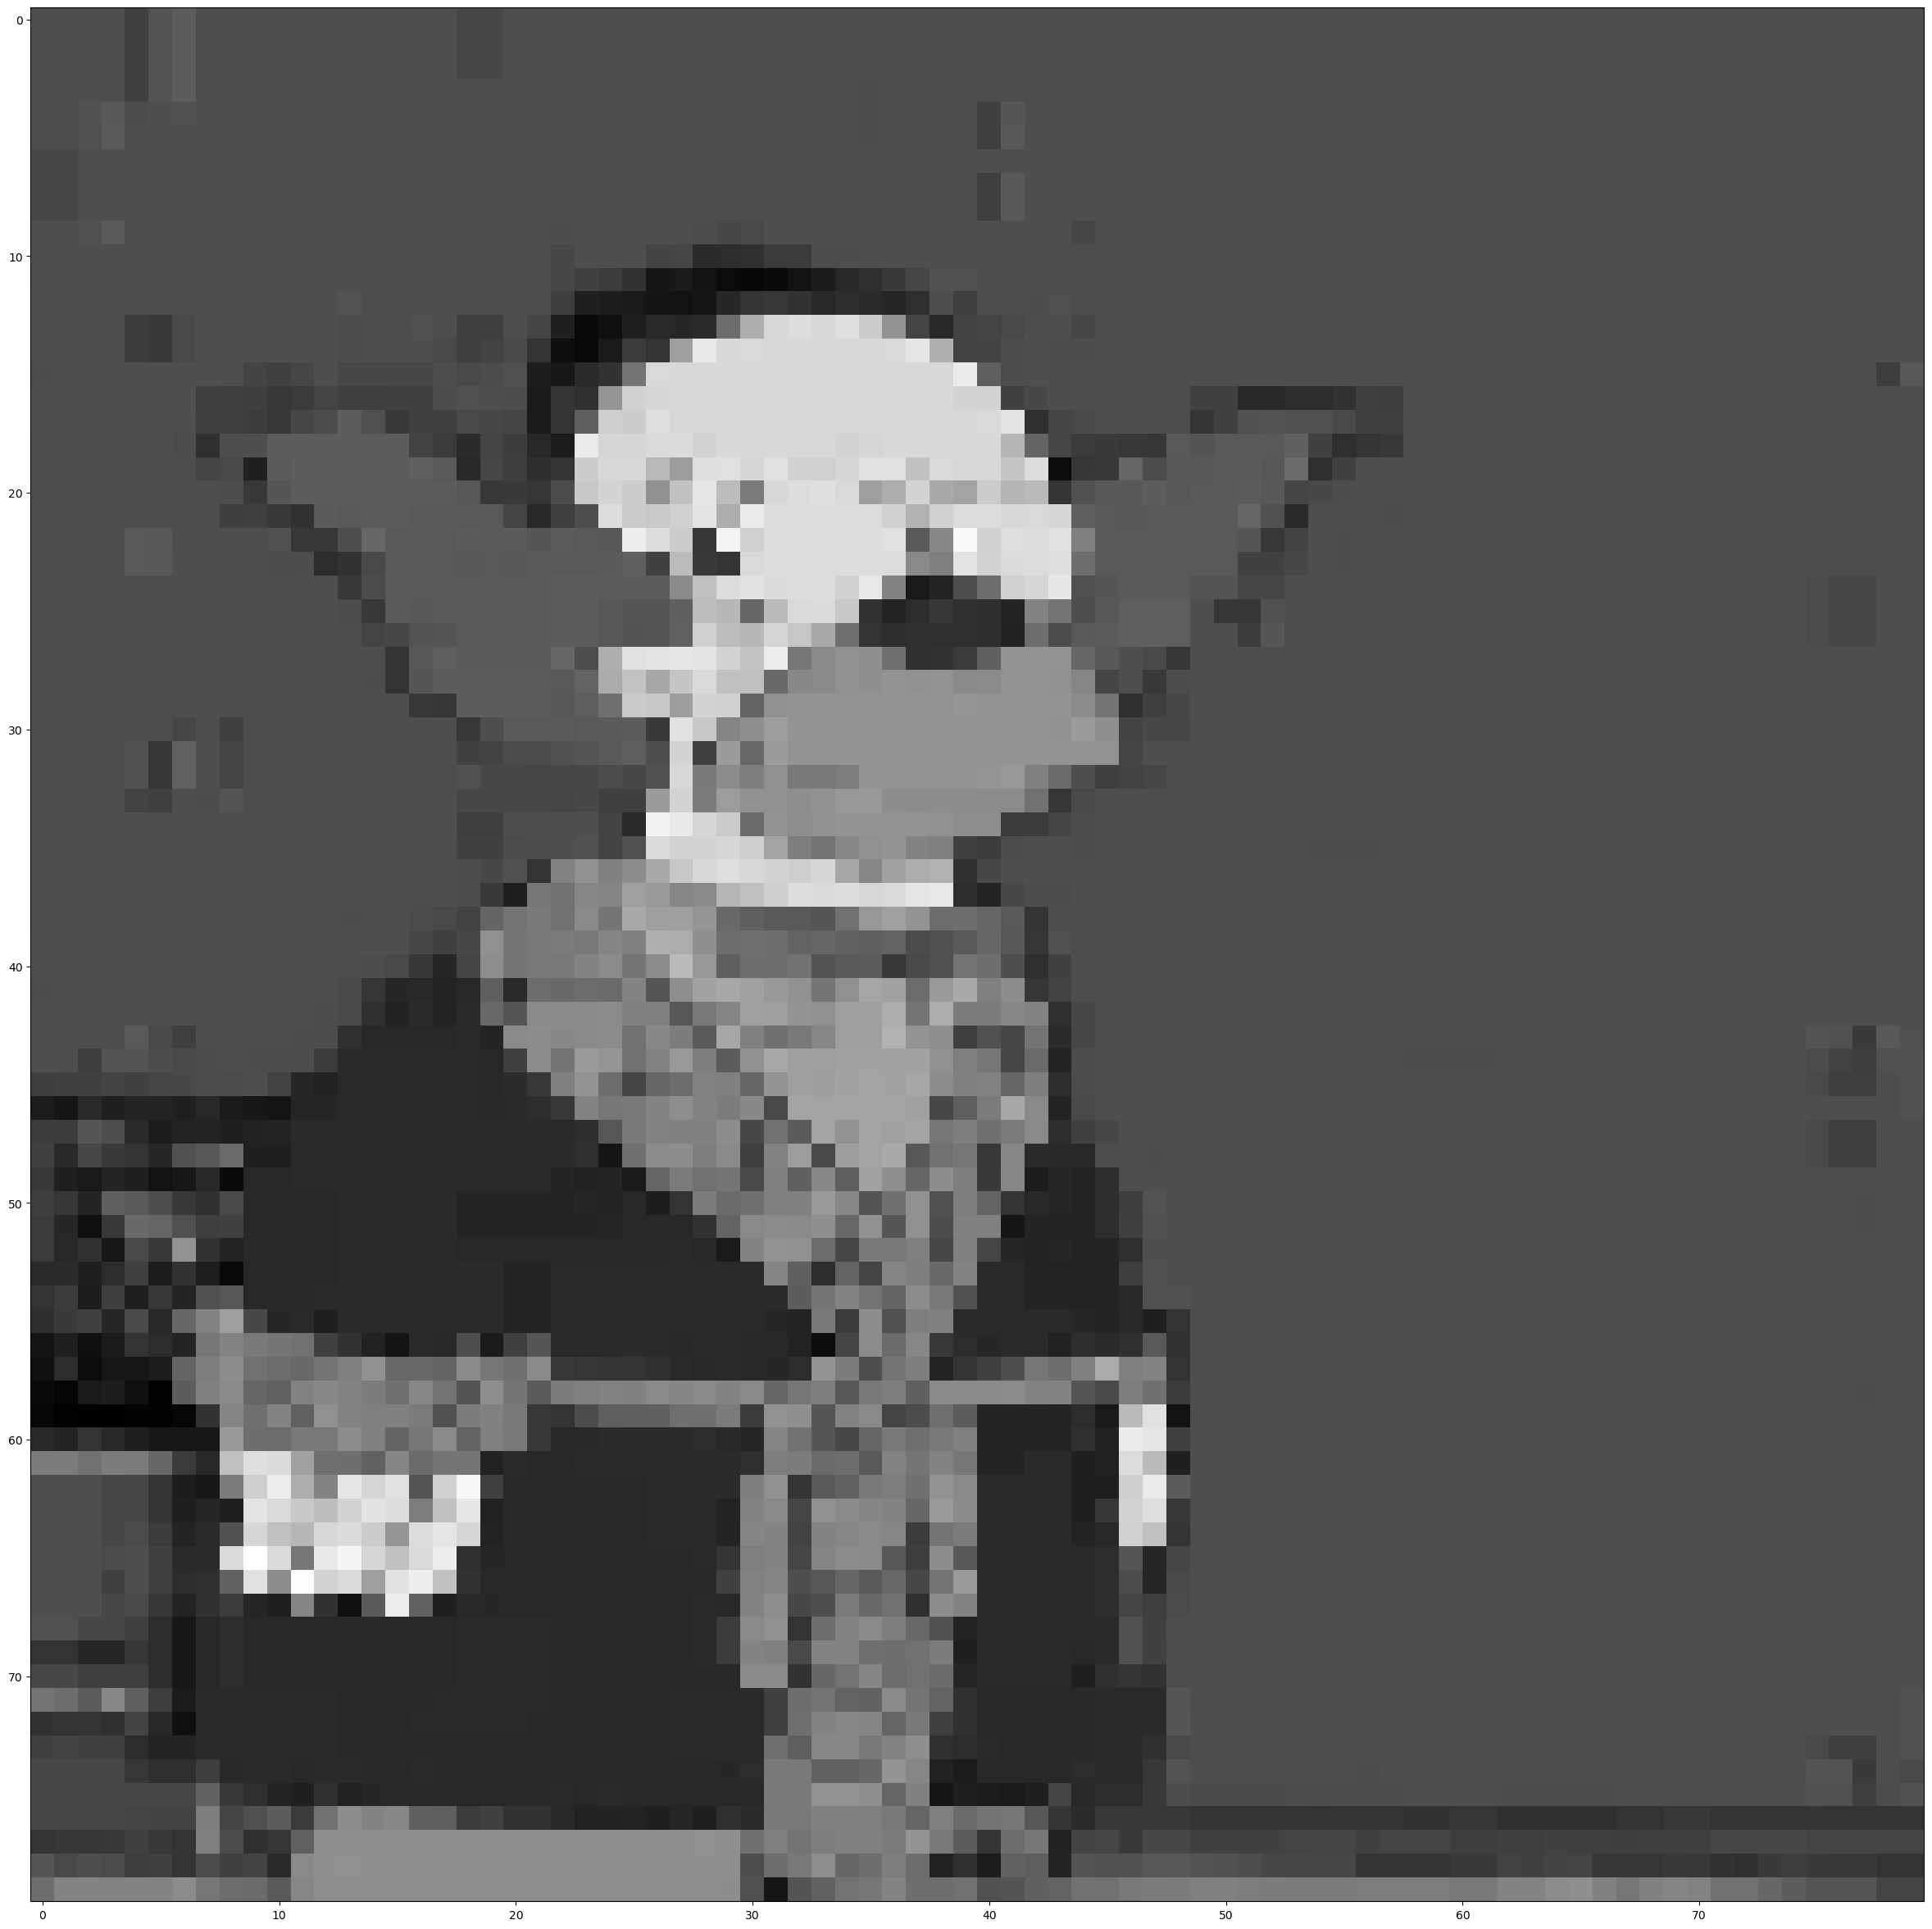

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap='gray')

In [19]:
from tensorflow.keras.utils import to_categorical
featureSet,label=caer.sep_train(train,IMG_SIZE=IMG_SIZE,channels=channel)
featureSet=caer.normalize(featureSet)
label=to_categorical(label,len(character))

In [20]:
print(label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [21]:
print(featureSet.shape,label.shape)

(13811, 80, 80, 1) (13811, 10)


In [22]:
x_train,val_x,y_train,val_y=caer.train_val_split(featureSet,label,val_ratio=0.2)

In [23]:
#after this we won't be using below mentioned variable so deleting it can give some space
del train
del featureSet
del label
gc.collect()

0

In [25]:
BATCH_SIZE=64
EPOCHS=12

# AWARE YOU ALREADY DID DATA AUGMENTATION
Data augmentation is a technique commonly used in machine learning, especially in the context of computer vision, to artificially increase the size of a training dataset by applying various transformations to the existing data. The goal is to create additional training examples that are variations of the original data, making the model more robust and improving its generalization to unseen data.

In the context of image data, data augmentation often involves applying transformations such as:

Rotation: Rotating the image by a certain angle.

Flip: Flipping the image horizontally or vertically.

Zoom: Zooming in or out of the image.

Shift: Shifting the image horizontally or vertically.

Shear: Applying a shear transformation to the image.

Brightness and Contrast Adjustment: Changing the brightness and contrast levels.

Color Jittering: Introducing small variations in color.

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:

datagen=canaro.generators.imageDataGenerator()
keras_datagen=ImageDataGenerator(
    preprocessing_function=datagen,
    rotation_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode="nearest")
    #while image is rotating if some pixel is mixing it will fix it
    #'nearest' fille pixel which is nearest
    #'constant' fill new pixel
    #"reflect": Reflects the image at the border, creating a mirrored effect.
    #"wrap": Wraps the image around, creating a cyclic effect
train_directory=r"C:\Users\vishnu\Downloads\PROJECTS\simpson\simpsons_dataset"
train_gen = keras_datagen.flow_from_directory(
    train_directory,
    target_size=IMG_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

epochs = 10
steps_per_epoch = train_gen.samples // BATCH_SIZE



Found 20933 images belonging to 42 classes.


In [28]:
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
from keras.optimizers import Adam 

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dense, Dropout
from keras.layers import BatchNormalization


# Define the CNN model
cnn = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.2),  # Adding a Dropout layer with 20% dropout rate

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Conv2D(filters=252, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.35),
    



    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 Simpson characters to predict
])

# Compile the model
cnn.compile(optimizer=Adam(learning_rate=0.01),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Summary of the model architecture
cnn.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 78, 78, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)      

In [30]:
x_train.shape

(11047, 80, 80, 1)

In [31]:
y_train_single = np.argmax(y_train, axis=1)
y_train_single.shape

(11047,)

In [32]:
y_train.shape


(11047, 10)

In [33]:
val_y_= np.argmax(val_y, axis=1)

In [34]:
val_y_.shape

(2764,)

In [36]:
from keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):

    lr = 0.01
    if epoch > 40:
        lr *= 0.1
    elif epoch > 30:
        lr *= 0.2
    elif epoch > 20:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

In [37]:
num_epochs = 30
cnn.fit(x_train, y_train_single, epochs=num_epochs,callbacks=[lr_scheduler])


Epoch 1/30
346/346 [==============================] - 53s 153ms/step - loss: 2.0931 - accuracy: 0.2448 - lr: 0.0100
Epoch 2/30
346/346 [==============================] - 67s 195ms/step - loss: 2.0460 - accuracy: 0.2773 - lr: 0.0100
Epoch 3/30
346/346 [==============================] - 69s 199ms/step - loss: 1.9516 - accuracy: 0.3207 - lr: 0.0100
Epoch 4/30
346/346 [==============================] - 61s 177ms/step - loss: 1.8593 - accuracy: 0.3545 - lr: 0.0100
Epoch 5/30
346/346 [==============================] - 58s 168ms/step - loss: 1.7466 - accuracy: 0.4001 - lr: 0.0100
Epoch 6/30
346/346 [==============================] - 64s 184ms/step - loss: 1.6756 - accuracy: 0.4285 - lr: 0.0100
Epoch 7/30
346/346 [==============================] - 62s 180ms/step - loss: 1.5589 - accuracy: 0.4759 - lr: 0.0100
Epoch 8/30
346/346 [==============================] - 61s 176ms/step - loss: 1.4710 - accuracy: 0.5054 - lr: 0.0100
Epoch 9/30
346/346 [==============================] - 60s 173ms/step - l

In [50]:
from keras.models import load_model

model = load_model('model_50e_new.keras')

In [51]:
from keras.models import load_model



model.evaluate(val_x,val_y_)

87/87 [==============================] - 5s 51ms/step - loss: 0.3325 - accuracy: 0.9070


[0.3325294852256775, 0.9070188403129578]

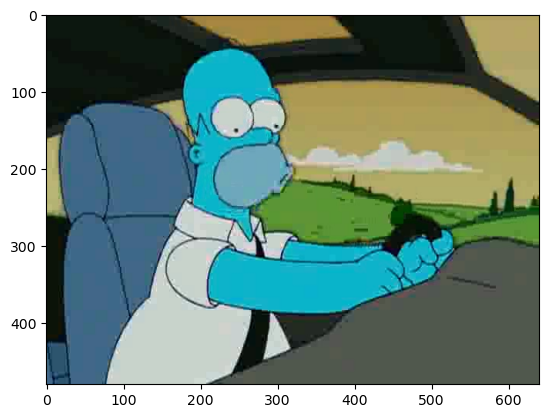

In [66]:
test_path=r"C:\Users\vishnu\Downloads\PROJECTS\simpson\simpsons_dataset\homer_simpson\pic_2075.jpg"
img=cv.imread(test_path)
plt.imshow(img)
plt.show()

In [67]:
 def pre(img):
    img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img=cv.resize(img,IMG_SIZE)
    img=caer.reshape(img,IMG_SIZE,1)
    return img

In [71]:
predict=cnn.predict(pre(img))
predict

1/1 [==============================] - 0s 38ms/step


array([[1.5889326e-06, 1.1314715e-06, 6.0735738e-01, 3.5752475e-12,
        9.3167912e-08, 3.2247212e-07, 4.3624084e-12, 9.0555241e-06,
        2.1046767e-19, 3.9263037e-01]], dtype=float32)

In [73]:
print(character[np.argmax(predict[0])])

homer_simpson
